<a href="https://colab.research.google.com/github/amruthkumarp/Regression_model/blob/main/Buliding_linear_regression_scarch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Regression

**Y=wx+b**

y=Dependent variable

x=independent variable

w=weight

b=bias

Gradient Descent

Gradient Descent is an Optimization model used to minimize the loss function in various machine learning algorith.it is used for uodating thr parameter of the learning model

w=w-a*dw;

b=b-a*db;

Learning data

Learning rate is a function parameter in an optimizatiion algorithm thet determines the step size at each iteration while moving toward a minimum of loss function



Learning rate



In [6]:
import numpy as np
import pandas as pd


In [216]:
import numpy as np
import pandas as pd

class Linear_regression:
  #intiating the parameters (learning rate and num_iteration)
    def __init__(self,Learning_rate,num_iteration):
      self.Learning_rate=Learning_rate
      self.num_iteration=num_iteration

    def fit(self,x,y):
      #number of traing example and number of feature
      self.m,self.n=x.shape
      #intiating the weights and bias
      self.w=np.zeros(self.n)
      self.b=0
      self.x=x
      self.y=y
      #implementing gradient descent

      for i in range(self.num_iteration):
        # Corrected the method call from update_weights to update_weight
        self.update_weight()

    def update_weight(self):
      # Corrected the method call self.predict(self,x) to self.predict(self.x)
      y_prediction=self.predict(self.x)
      #calculate gradient
      # Corrected the variable name y_Prediction to y_prediction
      dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
      # Corrected the variable name dp to db
      db=-2*np.sum(self.y-y_prediction)/self.m
      #updating weights
      self.w=self.w-self.Learning_rate*dw
      # Corrected the variable name db to self.b in the update step
      self.b=self.b-self.Learning_rate*db

    def predict(self,x):
      return x.dot(self.w)+self.b

In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [217]:
 from sklearn.datasets import fetch_california_housing
print(fetch_california_housing)
california_housing = fetch_california_housing(as_frame=True)

<function fetch_california_housing at 0x789672712160>


In [218]:
california_housing.frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [219]:
california_housing.frame.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [220]:
california_housing.frame.isnull().sum()

,0
MedInc,0
HouseAge,0
AveRooms,0
AveBedrms,0
Population,0
AveOccup,0
Latitude,0
Longitude,0
MedHouseVal,0


In [221]:
california_housing.frame.shape

(20640, 9)

data preprocessing

In [247]:
#spliting the feature and target
x=california_housing.frame.iloc[:,:-1].values
y=california_housing.frame.iloc[:,8].values.reshape(-1,1)
print(x.shape)
print(x)
print(y)
print(y.shape)

(20640, 8)
[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[[4.526]
 [3.585]
 [3.521]
 ...
 [0.923]
 [0.847]
 [0.894]]
(20640, 1)


In [248]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=2)

In [249]:
print(x_test.shape)
print(x_train.shape)
print(y_test.shape)
print(y_train.shape)

(6812, 8)
(13828, 8)
(6812, 1)
(13828, 1)


In [250]:
print(y_test)

[[2.787]
 [2.076]
 [0.967]
 ...
 [2.933]
 [2.188]
 [1.704]]


traning linear regression model

In [245]:
model=Linear_regression(Learning_rate=0.02,num_iteration=1000)

In [246]:
model.fit(x_train,y_train)

<ipython-input-216-5515696a32cc>:29: RuntimeWarning: overflow encountered in multiply
  dw=-(2*(self.x.T).dot(self.y-y_prediction))/self.m
<ipython-input-216-5515696a32cc>:33: RuntimeWarning: invalid value encountered in subtract
  self.w=self.w-self.Learning_rate*dw


In [234]:
#printing the parameter value
print('weight=',model.w[0])
print('bais=',model.b)

weight= nan
bais= nan


predicted salary value for a test data

In [235]:
test_data_prediction=model.predict(x_test)
print(test_data_prediction)
print(x_test)
print(y_test)

[nan nan nan ... nan nan nan]
[[   6.4114       15.            7.52755906 ...    3.31889764
    33.6        -117.65      ]
 [   4.1843       12.            6.33008357 ...    2.83147632
    38.62       -120.91      ]
 [   1.7411       35.            5.36915888 ...    4.24766355
    33.93       -118.23      ]
 ...
 [   4.2639       31.            5.688771   ...    3.12997347
    34.24       -118.33      ]
 [   2.8472       44.            5.1697417  ...    2.2398524
    34.18       -118.17      ]
 [   4.9792       11.            6.40082645 ...    2.87396694
    32.64       -117.        ]]
[2.787 2.076 0.967 ... 2.933 2.188 1.704]


In [236]:
print(x_test[:,0].shape)

(6812,)


*vallidation from the in bulit model*


In [252]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(x_train,y_train)

print("intercept:",model1.intercept_)
print("slope:",model1.coef_)

#pridect
y_pred=model1.predict(x_test)
print(y_pred.shape)


intercept: [-35.46726828]
slope: [[ 4.43957030e-01  9.15965921e-03 -1.12973782e-01  5.99031540e-01
  -2.60227001e-06 -3.87087102e-03 -4.05564383e-01 -4.17963899e-01]]
(6812, 1)


In [259]:
print(y_pred)

[[2.82206168]
 [1.26609212]
 [1.43136577]
 ...
 [2.24602495]
 [1.67786981]
 [2.376781  ]]


In [265]:
from sklearn.metrics import r2_score
print("r2 score: ")
print(r2_score(y_test,y_pred))

r2 score: 
0.6029464387260083


In [266]:
print(y_test.shape)

(6812, 1)


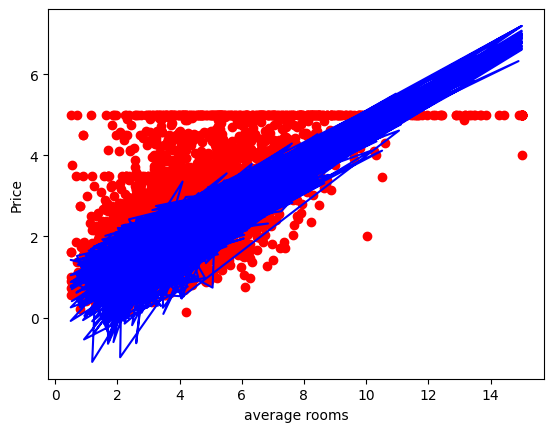

In [267]:
plt.scatter(x_test[:,0],y_test,color='red')
plt.plot(x_test[:,0],y_pred,color='blue')
plt.xlabel('average rooms')
plt.ylabel('Price')
plt.show()